In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\subra\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

# Feature Selection

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Nans

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Error detection

<Axes: >

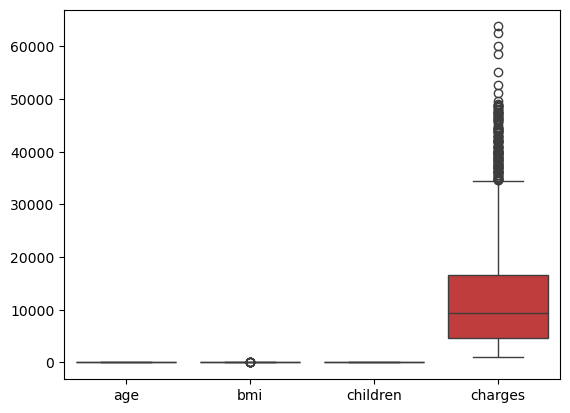

In [6]:
sns.boxplot(df)

<Axes: ylabel='bmi'>

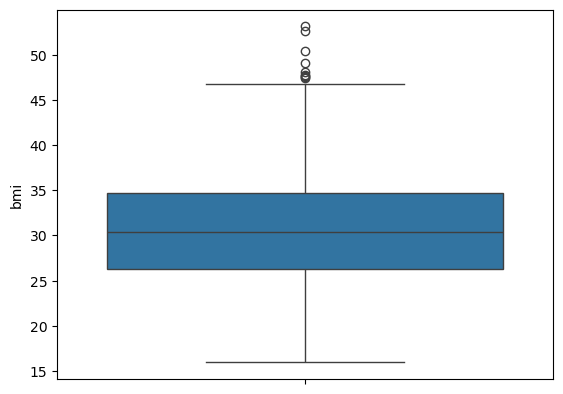

In [7]:
sns.boxplot(df["bmi"])

## Applying IQR on BMI column

In [8]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [9]:
q1 = df["bmi"].quantile(0.25)
q1

26.29625

In [10]:
q3 = df["bmi"].quantile(0.75)
q3

34.69375

In [11]:
IQR = q3 - q1
IQR

8.3975

In [12]:
lower_limit = q1 - (1.5*IQR)
lower_limit

13.7

In [13]:
upper_limit = q3 + (1.5*IQR)
upper_limit

47.290000000000006

In [14]:
df[df["bmi"] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [15]:
df[df["bmi"] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [16]:
(df["bmi"] < lower_limit) | (df["bmi"] > upper_limit)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [17]:
df[(df["bmi"] < lower_limit) | (df["bmi"] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


## Capping

In [18]:
df["bmi"] = df["bmi"].map(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x) ## here inplace can't be used so we modify it in the new column

In [19]:
df[(df["bmi"] < lower_limit) | (df["bmi"] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges


<Axes: ylabel='bmi'>

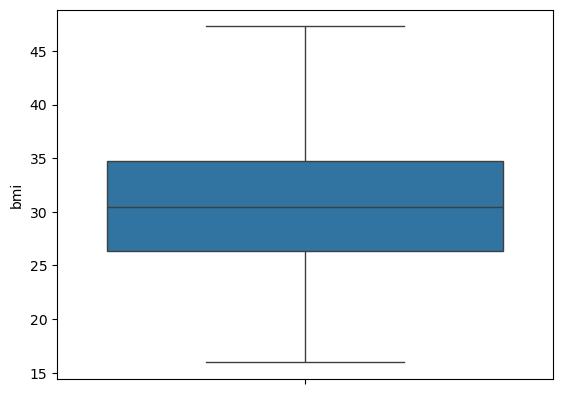

In [20]:
sns.boxplot(df["bmi"])

## Encoding

In [21]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
df["sex"].unique() ## Nominal Categorical Distribution/data

array(['female', 'male'], dtype=object)

In [23]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [24]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder()

In [27]:
ohe

OneHotEncoder()

In [28]:
ohe.fit(df[["sex"]])

OneHotEncoder()

In [29]:
ohe.transform(df[["sex"]]) ## we will get sparse matrix by runing this one

<1338x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [30]:
ary_gen =  ohe.transform(df[["sex"]]).toarray() ## toarray is used to show the sparse matrix

In [31]:
ary_gen

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [33]:
pd.DataFrame(ary_gen, dtype = "int", columns = ["Sex_Female", "Sex_Male"])

,Sex_Female,Sex_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [34]:
df_new = pd.DataFrame(ary_gen, dtype = "int", columns = ["Sex_Female", "Sex_Male"])
df_new

,Sex_Female,Sex_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [35]:
df.drop("sex", axis = 1, inplace = True)

In [36]:
df = pd.concat([ df,df_new], axis = 1)
df

,age,bmi,children,smoker,region,charges,Sex_Female,Sex_Male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


<Axes: ylabel='charges'>

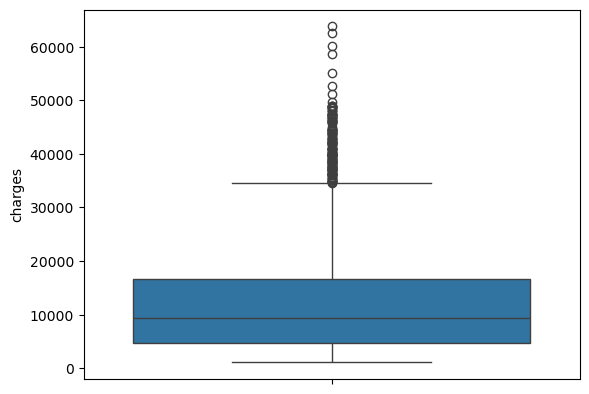

In [37]:
sns.boxplot(df["charges"])

In [38]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [39]:
qc1 = df["charges"].quantile(0.25)
qc1

4740.28715

In [40]:
qc3 = df["charges"].quantile(0.75)
qc3

16639.912515

In [41]:
IQRc = qc3 - qc1
IQRc

11899.625365

In [42]:
lower_limit_c = qc1 - (1.5*IQR)
lower_limit_c

4727.6909000000005

In [43]:
upper_limit_c = qc3 + (1.5*IQR)
upper_limit_c

16652.508765

In [44]:
df[(df["charges"] < lower_limit_c) | (df["charges"] > upper_limit_c)]

,age,bmi,children,smoker,region,charges,Sex_Female,Sex_Male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1328,23,24.225,2,no,northeast,22395.74424,1,0
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


## Region Column

In [45]:
df["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [46]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
ohe1 = OneHotEncoder(drop = "first")
ohe

OneHotEncoder()

In [49]:
ohe1.fit(df[["region"]])

OneHotEncoder(drop='first')

In [50]:
ohe1.transform(df[["region"]])

<1338x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [51]:
ohe1.transform(df[["region"]]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [52]:
ary_region = ohe1.transform(df[["region"]]).toarray()

In [53]:
ary_region

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [54]:
ohe1.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [55]:
pd.DataFrame(ary_region, dtype= "int", columns = ['region_northwest', 'region_southeast', 'region_southwest'])

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [56]:
df_region = pd.DataFrame(ary_region, dtype= "int", columns = ['region_northwest', 'region_southeast', 'region_southwest'])

In [57]:
df_region

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [58]:
df.head()

,age,bmi,children,smoker,region,charges,Sex_Female,Sex_Male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [59]:
df_region.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [60]:
df = pd.concat([df , df_region], axis = 1)
df

,age,bmi,children,smoker,region,charges,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,southwest,16884.92400,1,0,0,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,0,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,0,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,1,0,0
4,32,28.880,0,no,northwest,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1,1,0,0
1334,18,31.920,0,no,northeast,2205.98080,1,0,0,0,0
1335,18,36.850,0,no,southeast,1629.83350,1,0,0,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0,0,0,1


In [61]:
df.drop("region", axis = 1, inplace = True)

In [62]:
df

,age,bmi,children,smoker,charges,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1,0,0,0,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0
3,33,22.705,0,no,21984.47061,0,1,1,0,0
4,32,28.880,0,no,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,1,0,0
1334,18,31.920,0,no,2205.98080,1,0,0,0,0
1335,18,36.850,0,no,1629.83350,1,0,0,1,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,1


## get_dummies

In [63]:
df_smoker = pd.get_dummies(df["smoker"], drop_first = True).replace([True,False], [1,0])
df_smoker

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [64]:
import warnings

In [65]:
df = pd.concat([df, df_smoker],axis = 1)
df

,age,bmi,children,smoker,charges,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest,yes
0,19,27.900,0,yes,16884.92400,1,0,0,0,1,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0,0
3,33,22.705,0,no,21984.47061,0,1,1,0,0,0
4,32,28.880,0,no,3866.85520,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,1,0,0,0
1334,18,31.920,0,no,2205.98080,1,0,0,0,0,0
1335,18,36.850,0,no,1629.83350,1,0,0,1,0,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,1,0


In [66]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'Sex_Female', 'Sex_Male',
       'region_northwest', 'region_southeast', 'region_southwest', 'yes'],
      dtype='object')

In [67]:
df.colums = ['age', 'bmi', 'children', 'smoker', 'charges', 'Sex_Female', 'Sex_Male',
       'Sex_Female', 'Sex_Male', 'region_northwest', 'region_southeast',
       'region_southwest', 'region_northwest', 'region_southeast',
       'region_southwest', 'Sex_Female', 'Sex_Male', 'yes']
df

C:\Users\subra\AppData\Local\Temp\ipykernel_14164\3409107571.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = ['age', 'bmi', 'children', 'smoker', 'charges', 'Sex_Female', 'Sex_Male',


,age,bmi,children,smoker,charges,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest,yes
0,19,27.900,0,yes,16884.92400,1,0,0,0,1,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0,0
3,33,22.705,0,no,21984.47061,0,1,1,0,0,0
4,32,28.880,0,no,3866.85520,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,1,0,0,0
1334,18,31.920,0,no,2205.98080,1,0,0,0,0,0
1335,18,36.850,0,no,1629.83350,1,0,0,1,0,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,1,0


In [68]:
df.drop(["smoker"], axis = 1, inplace = True)

In [69]:
df.rename(columns={'yes': 'smoker'}, inplace=True)

In [70]:
df

,age,bmi,children,charges,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest,smoker
0,19,27.900,0,16884.92400,1,0,0,0,1,1
1,18,33.770,1,1725.55230,0,1,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,1,0,0
3,33,22.705,0,21984.47061,0,1,1,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,0
1334,18,31.920,0,2205.98080,1,0,0,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,1,0,0
1336,21,25.800,0,2007.94500,1,0,0,0,1,0


In [71]:
X = df.drop("charges", axis = 1)
X

,age,bmi,children,Sex_Female,Sex_Male,region_northwest,region_southeast,region_southwest,smoker
0,19,27.900,0,1,0,0,0,1,1
1,18,33.770,1,0,1,0,1,0,0
2,28,33.000,3,0,1,0,1,0,0
3,33,22.705,0,0,1,1,0,0,0
4,32,28.880,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,0
1334,18,31.920,0,1,0,0,0,0,0
1335,18,36.850,0,1,0,0,1,0,0
1336,21,25.800,0,1,0,0,0,1,0


In [72]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Data splitting

type(X)

In [73]:
type(y)

pandas.core.series.Series

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15)

In [76]:
X_train.shape

(1070, 9)

In [77]:
X_test.shape

(268, 9)

In [78]:
y_train.shape

(1070,)

In [79]:
y_test.shape

(268,)

## Model_building

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [82]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [83]:
lr_model.score(X_test, y_test)

0.7712847112489238

## Auto Random state -- can be used to find the best random state index which can give the max score

In [84]:
score = []

for i in range(0,1000):
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = i) ## we can use random_score here to get the same random values all the time
    lr_model = LinearRegression()
    lr_model.fit(Xtrain, ytrain)
    sc =  lr_model.score(Xtest, ytest)
    score.append(sc)
    
m = max(score)
print("Max_score:", m*100)
rsi = score.index(m)
print("Max_score_index:", rsi)

Max_score: 83.3130909272021
Max_score_index: 367


## Prediction charges for new values 

In [85]:
lr_model.predict([[10, 27.784, 0, 0, 0 , 0, 1, 1,0]])

D:\Anacondas\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2018.40342287])

## Auto ML

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
from sklearn.svm import SVR

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
from xgboost import XGBRegressor

In [94]:
Lr_models = LinearRegression()

In [95]:
Dtr_model = DecisionTreeRegressor()

In [96]:
Rfr_model = RandomForestRegressor()

In [97]:
Svm_model = SVR()

In [98]:
Knn_model = KNeighborsRegressor()

In [99]:
Abr_model = AdaBoostRegressor()

In [100]:
Gbr_model = GradientBoostingRegressor()

In [101]:
Xgb_model = XGBRegressor()

In [102]:
models = [Lr_models, Dtr_model , Rfr_model, Svm_model, Knn_model, Abr_model, Gbr_model, Xgb_model]
models

[LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 SVR(),
 KNeighborsRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)]

In [103]:
import time

In [104]:
for m in models: 
    print(m)
    time.sleep(1)

LinearRegression()
DecisionTreeRegressor()
RandomForestRegressor()
SVR()
KNeighborsRegressor()
AdaBoostRegressor()
GradientBoostingRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [105]:
for m in models:
    m.fit(X_train, y_train)
    s = m.score(X_test, y_test)
    print(m, ":", s)
    time.sleep(2)

LinearRegression() : 0.7712847112489238
DecisionTreeRegressor() : 0.7080852579140489
RandomForestRegressor() : 0.8525454899646134
SVR() : -0.0467043946847181
KNeighborsRegressor() : 0.177141402530394
AdaBoostRegressor() : 0.8256685614152262
GradientBoostingRegressor() : 0.877989667498943
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_j

### Having identified the two top-performing models, the next step is to evaluate their optimal scores to determine the best-performing model

In [106]:
score = []
for i in range(0,1000):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = i) ## we can use random_score here to get the same random values all the time
    Gbr_model = GradientBoostingRegressor()
    Gbr_model.fit(Xtrain, ytrain)
    sc =  Gbr_model.score(Xtest, ytest)
    score.append(sc)
m = max(score)
print("Max_score:", m*100)
rsi = score.index(m)
print("Max_score_index:", rsi)

Max_score: 92.69296215507606
Max_score_index: 461


In [107]:
score = []
for i in range(0,1000):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = i) ## we can use random_score here to get the same random values all the time
    Rfr_model = RandomForestRegressor()
    Rfr_model.fit(Xtrain, ytrain)
    sc =  Rfr_model.score(Xtest, ytest)
    score.append(sc)
m = max(score)
print("Max_score:", m*100)
rsi = score.index(m)
print("Max_score_index:", rsi)

Max_score: 90.60917749507709
Max_score_index: 943


### The evaluation phase concluded with **Gradient Boosting Regressor** outperforming all other iterations. This model achieved a benchmark accuracy of **92%**, establishing it as the most reliable predictor for this Medical Insurance Dataset.